In [1]:
import os
import difflib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches as mpatches

import sys
sys.path.append('../../')
from rllte.evaluation.visualization import _annotate_and_decorate_axis, plot_interval_estimates
from rllte.evaluation import Performance

In [2]:
envs = ['1MazeHard', 'AllMazeHard']

for env in envs:
    print(env)
    root = '/Users/yuanmingqi/Downloads/q6/' + env
    for folder in os.listdir(root):
        if folder == '.DS_Store':
            continue
        if len(os.listdir(os.path.join(root, folder))) != 1:
            print(folder, os.listdir(os.path.join(root, folder)))

1MazeHard
PPO_1MazeHard-v0_pseudocounts_obsRMS:True_rewNorm:rms_updateProp:0.5_rff:False_weightInit:orthogonal_s3 ['.DS_Store', '2024-04-14-12-59-11']
twoHeadPPO_1MazeHard-v0_ride_obsRMS:True_rewNorm:rms_updateProp:0.1_rff:False_weightInit:orthogonal_s5 ['.DS_Store', '2024-04-13-02-50-13']
PPO_1MazeHard-v0_icm_obsRMS:True_rewNorm:none_updateProp:1.0_rff:False_weightInit:orthogonal_s1 ['.DS_Store', '2024-04-12-03-45-14', '2024-04-12-03-29-04']
twoHeadPPO_1MazeHard-v0_icm_obsRMS:True_rewNorm:none_updateProp:1.0_rff:False_weightInit:orthogonal_s1 ['2024-04-12-04-47-41', '2024-04-12-05-03-22']
PPO_1MazeHard-v0_ngu_obsRMS:True_rewNorm:rms_updateProp:0.5_rff:False_weightInit:orthogonal_s4 ['.DS_Store', '2024-04-12-01-35-03']
PPO_1MazeHard-v0_icm_obsRMS:True_rewNorm:none_updateProp:1.0_rff:False_weightInit:orthogonal_s5 ['.DS_Store', '2024-04-13-12-27-51', '2024-04-12-11-49-57']
PPO_1MazeHard-v0_icm_obsRMS:True_rewNorm:none_updateProp:1.0_rff:False_weightInit:orthogonal_s2 ['.DS_Store', '2024

In [3]:
algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'RE3', 'NGU']
# root = "/Users/yuanmingqi/Downloads/nips2024_data/q3/01/"

envs = ['1MazeHard', 'AllMazeHard']

for env in envs:
    root = f'/Users/yuanmingqi/Downloads/q6/{env}'
    num_points = 10
    all_data = {algo: [] for algo in algos}
    for algo in algos:
        for dir in os.listdir(root):
            if algo.lower() in dir:
                file = f"{root}/{dir}/"
                file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
                data = pd.read_csv(file)#['episode_reward']
                if data['step'].values[-1] != 24985600:
                    print(env, dir)

# 1 Maze Hard

PPO_ ICM (5, 1, 10)
PPO_ Disagreement (5, 1, 10)
PPO_ E3B (5, 1, 10)
PPO_ RND (5, 1, 10)
PPO_ PseudoCounts (5, 1, 10)
PPO_ RIDE (5, 1, 10)
PPO_ RE3 (5, 1, 10)
PPO_ NGU (5, 1, 10)
PPO_ Extrinsic (5, 1, 10)
twoHeadPPO_ ICM (5, 1, 10)
twoHeadPPO_ Disagreement (5, 1, 10)
twoHeadPPO_ E3B (5, 1, 10)
twoHeadPPO_ RND (5, 1, 10)
twoHeadPPO_ PseudoCounts (5, 1, 10)
twoHeadPPO_ RIDE (5, 1, 10)
twoHeadPPO_ RE3 (5, 1, 10)
twoHeadPPO_ NGU (5, 1, 10)
twoHeadPPO_ Extrinsic (0, 1)


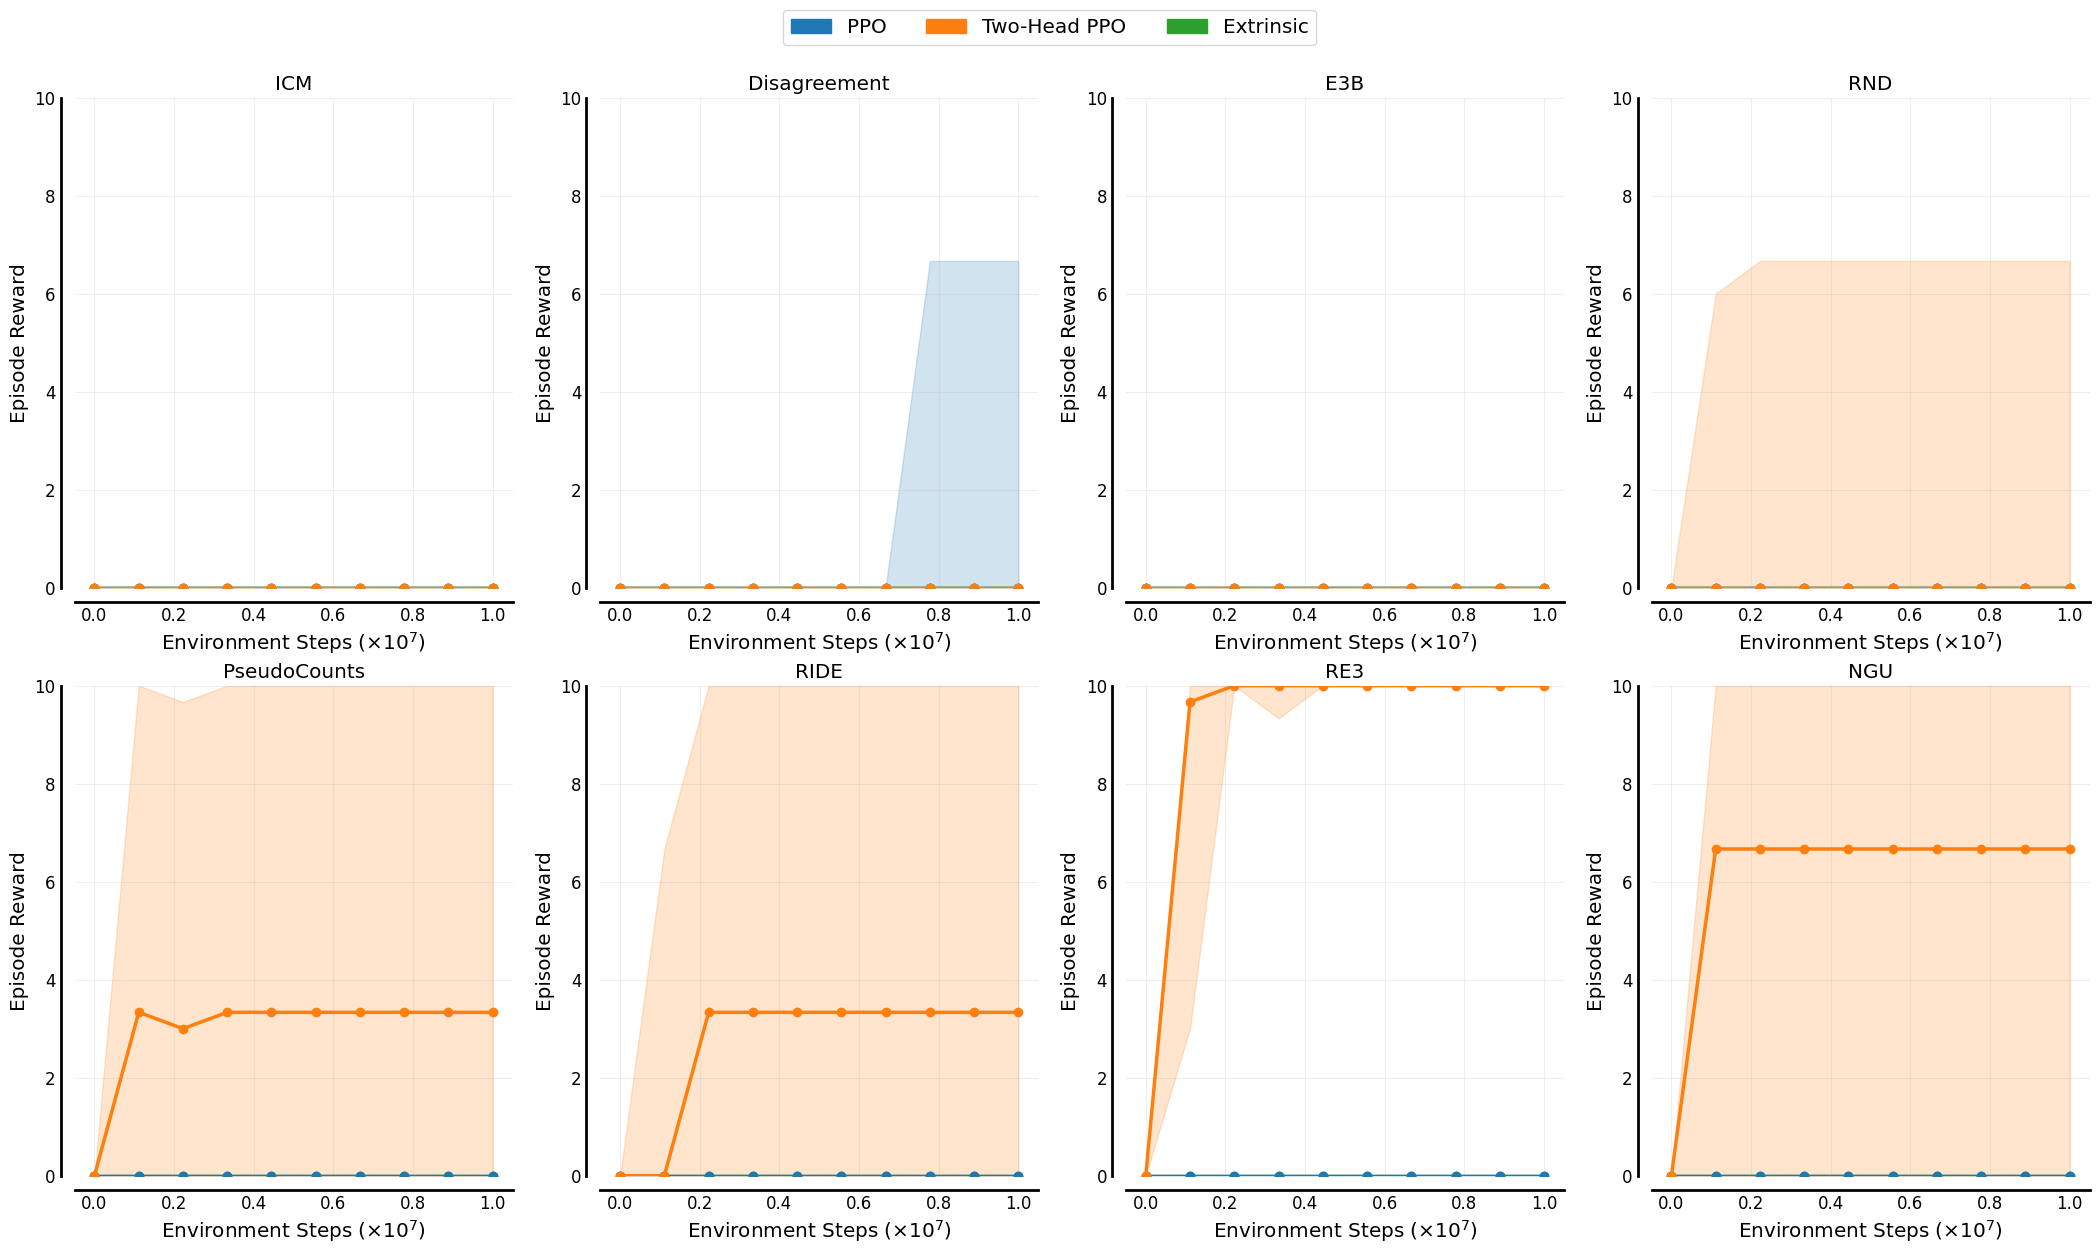

In [5]:
algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'RE3', 'NGU', 'Extrinsic']
# colors = sns.color_palette("husl", len(algos))
# colors = sns.husl_palette(3, h=.5)
colors = sns.color_palette()
fake_patches = [mpatches.Patch(color=colors[i], label=alg) for i, alg in enumerate(['PPO', 'Two-Head PPO', 'Extrinsic'])]

fig, axes = plt.subplots(2, 4, figsize=(26, 14))
legends = ['PPO', 'Two-Head PPO']
lines = []

for subplot_idx, candidate in enumerate(['PPO_', 'twoHeadPPO_']):
    root = f"/Users/yuanmingqi/Downloads/nips2024_data/q6/1MazeHard/"
    num_points = 10
    all_data = {algo: [] for algo in algos}

    for algo in algos:
        for dir in os.listdir(root):
            if algo.lower() in dir and dir.startswith(candidate):
                file = f"{root}/{dir}/"
                file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
                data = pd.read_csv(file)['episode_reward']
                data = data[np.linspace(0, data.shape[0]-1, num_points, dtype=int)]
                all_data[algo].append(data)

        all_data[algo] = np.array(all_data[algo])
        all_data[algo] = np.expand_dims(all_data[algo], axis=1)
        print(candidate, algo, all_data[algo].shape)

    sampling_dict = dict()
    for algo in algos:
        if algo.lower() == 'extrinsic' and subplot_idx == 1:
            continue
        sampling_dict[algo] = [[], [], []]
        for frame in range(num_points):
            perf = Performance(all_data[algo][:, :, frame], get_ci=True, reps=2000)
            value, CIs = perf.aggregate_iqm()
            sampling_dict[algo][0].append(value)
            sampling_dict[algo][1].append(CIs[0]) # lower bound
            sampling_dict[algo][2].append(CIs[1]) # upper bound

        sampling_dict[algo][0] = np.array(sampling_dict[algo][0]).reshape(-1)
        sampling_dict[algo][1] = np.array(sampling_dict[algo][1]).reshape(-1)
        sampling_dict[algo][2] = np.array(sampling_dict[algo][2]).reshape(-1)

    for algo_idx, algo in enumerate(algos[:-1]):
        mean, ci_high, ci_low = sampling_dict[algo]
        ax = axes.flatten()[algo_idx]
        x = np.linspace(0, 1, num_points)
        if subplot_idx == 0:
            # ax.axhline(y=30.0, color='k', linestyle='--', linewidth=2, label="Extrinsic")
            ax.plot(x, mean, linewidth=2.5, marker='o', markersize=6, c=colors[2], label='Extrinsic')
        ax.plot(x, mean, linewidth=2.5, marker='o', markersize=6, c=colors[subplot_idx], label=legends[subplot_idx])
        ax.fill_between(x, ci_high, ci_low, alpha=0.2, color=colors[subplot_idx])
        ax.set_ylim(0, 10)
        ax.set_title(algos[algo_idx], fontsize="x-large")
        ax = _annotate_and_decorate_axis(ax, 
                                        ticklabelsize="large",
                                        xlabel=r"Environment Steps ($\times 10^7$)", 
                                        ylabel="Episode Reward",
                                        xticklabels=np.linspace(0, 1, num_points),
                                        )
        
fig.legend(fake_patches, ['PPO', 'Two-Head PPO', 'Extrinsic'], loc='upper center', 
    fancybox=True, ncol=len(algos), 
    fontsize='x-large',
    bbox_to_anchor=(0.5, 0.95))
fig.savefig('figure_rq6_curves_1mazehard.pdf', bbox_inches='tight', dpi=300)

# All Maze Hard

PPO_ ICM (5, 1, 10)
PPO_ Disagreement (5, 1, 10)
PPO_ E3B (5, 1, 10)
PPO_ RND (5, 1, 10)
PPO_ PseudoCounts (5, 1, 10)
PPO_ RIDE (5, 1, 10)
PPO_ RE3 (5, 1, 10)
PPO_ NGU (5, 1, 10)
PPO_ Extrinsic (5, 1, 10)
twoHeadPPO_ ICM (5, 1, 10)
twoHeadPPO_ Disagreement (5, 1, 10)
twoHeadPPO_ E3B (5, 1, 10)
twoHeadPPO_ RND (10, 1, 10)
twoHeadPPO_ PseudoCounts (5, 1, 10)
twoHeadPPO_ RIDE (5, 1, 10)
twoHeadPPO_ RE3 (5, 1, 10)
twoHeadPPO_ NGU (5, 1, 10)
twoHeadPPO_ Extrinsic (0, 1)


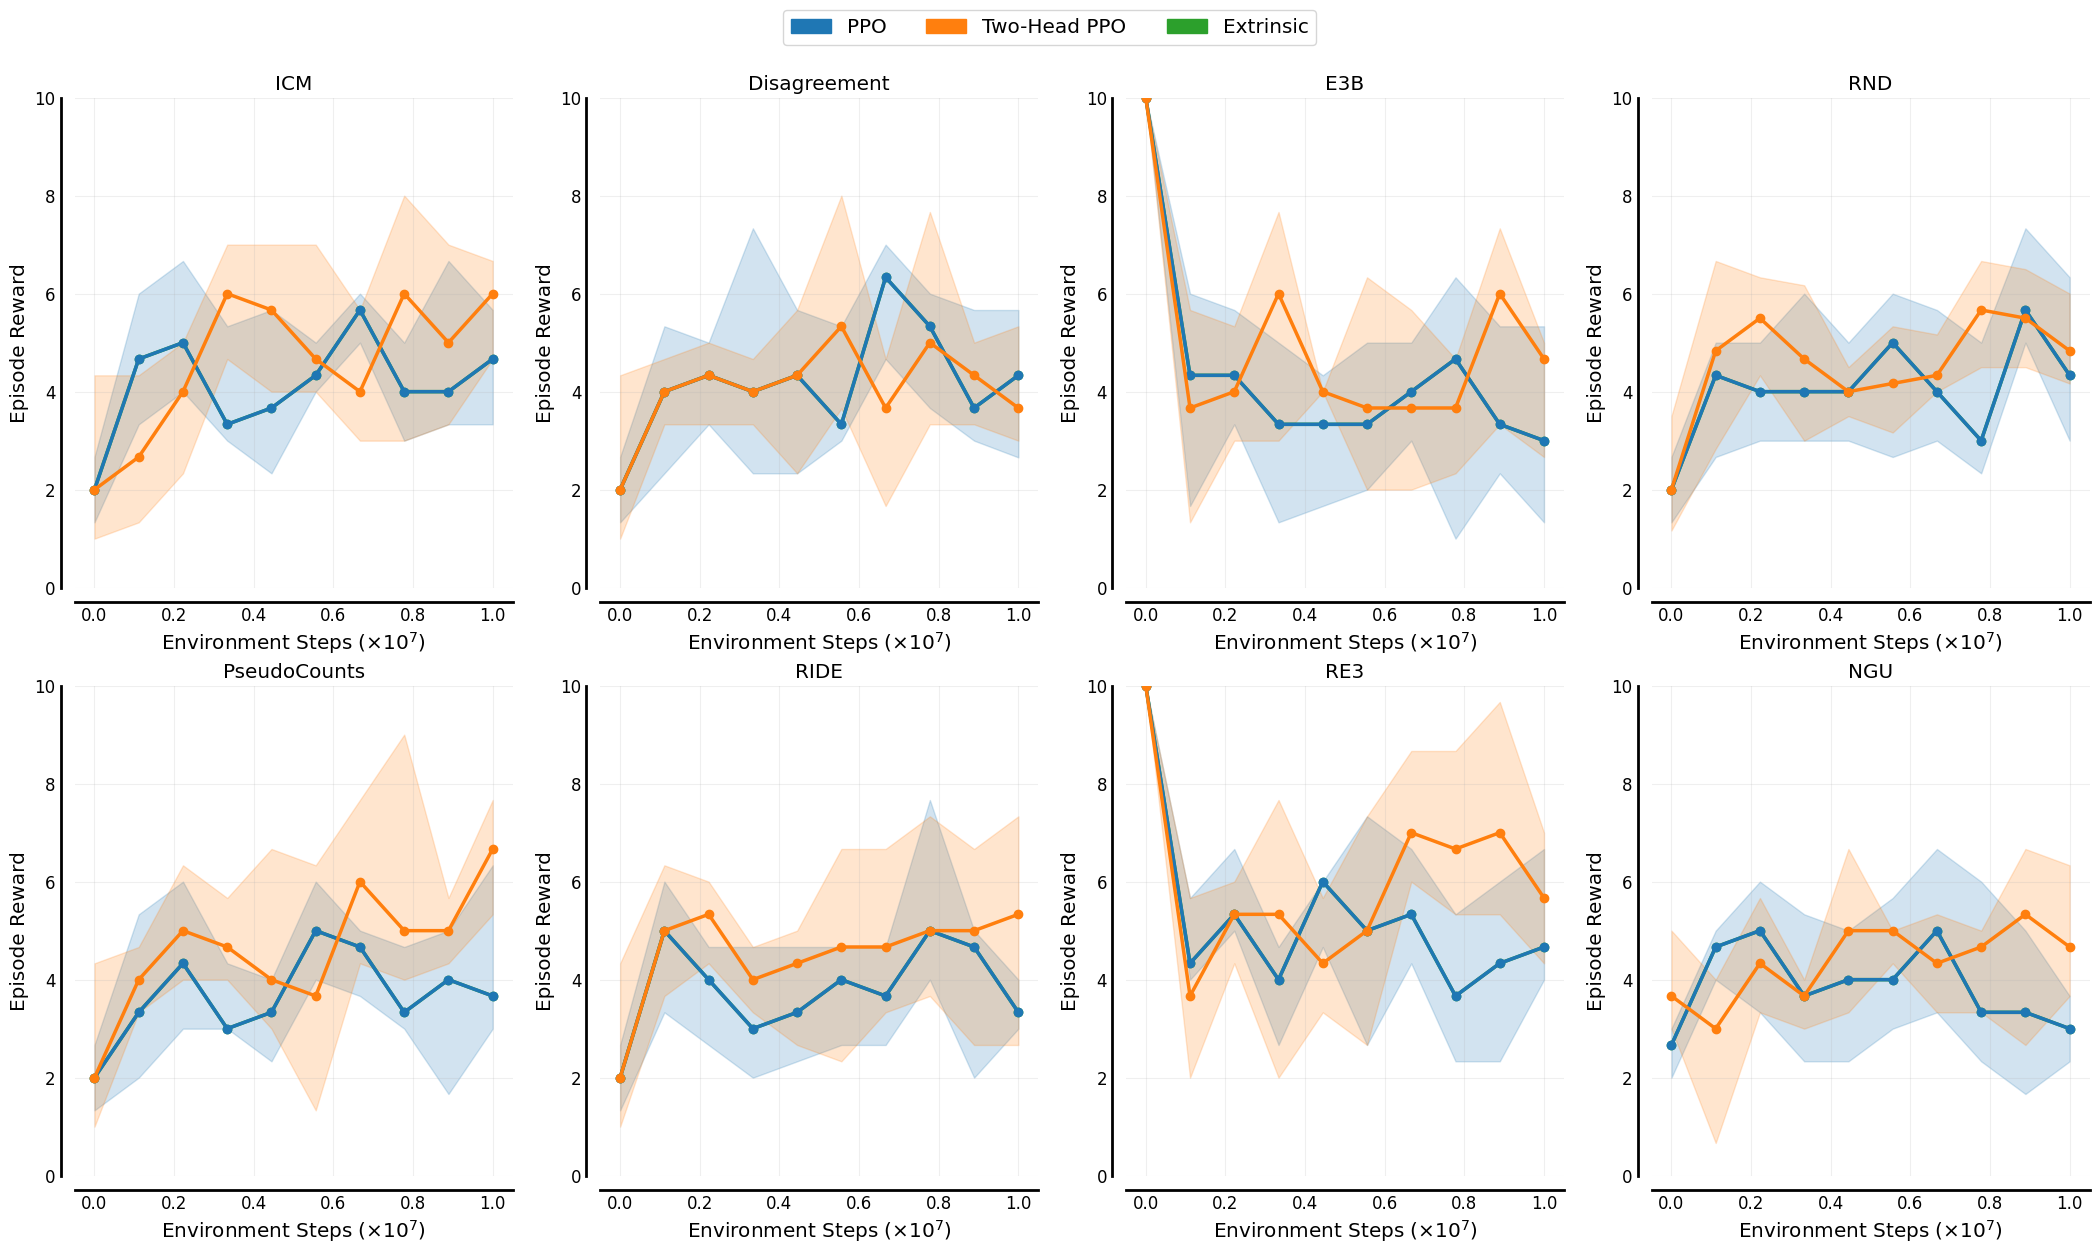

In [6]:
algos = ['ICM', 'Disagreement', 'E3B', 'RND', 'PseudoCounts', 'RIDE', 'RE3', 'NGU', 'Extrinsic']
# colors = sns.color_palette("husl", len(algos))
# colors = sns.husl_palette(3, h=.5)
colors = sns.color_palette()
fake_patches = [mpatches.Patch(color=colors[i], label=alg) for i, alg in enumerate(['PPO', 'Two-Head PPO', 'Extrinsic'])]

fig, axes = plt.subplots(2, 4, figsize=(26, 14))
legends = ['PPO', 'Two-Head PPO']
lines = []

for subplot_idx, candidate in enumerate(['PPO_', 'twoHeadPPO_']):
    root = f"/Users/yuanmingqi/Downloads/nips2024_data/q6/AllMazeHard/"
    num_points = 10
    all_data = {algo: [] for algo in algos}

    for algo in algos:
        for dir in os.listdir(root):
            if algo.lower() in dir and dir.startswith(candidate):
                file = f"{root}/{dir}/"
                file = file + difflib.get_close_matches("2024-", os.listdir(file), 1, 0.1)[0] + '/train.log'
                data = pd.read_csv(file)['episode_reward']
                data = data[np.linspace(0, data.shape[0]-1, num_points, dtype=int)]
                all_data[algo].append(data)

        all_data[algo] = np.array(all_data[algo])
        all_data[algo] = np.expand_dims(all_data[algo], axis=1)
        print(candidate, algo, all_data[algo].shape)

    sampling_dict = dict()
    for algo in algos:
        if algo.lower() == 'extrinsic' and subplot_idx == 1:
            continue
        sampling_dict[algo] = [[], [], []]
        for frame in range(num_points):
            perf = Performance(all_data[algo][:, :, frame], get_ci=True, reps=2000)
            value, CIs = perf.aggregate_iqm()
            sampling_dict[algo][0].append(value)
            sampling_dict[algo][1].append(CIs[0]) # lower bound
            sampling_dict[algo][2].append(CIs[1]) # upper bound

        sampling_dict[algo][0] = np.array(sampling_dict[algo][0]).reshape(-1)
        sampling_dict[algo][1] = np.array(sampling_dict[algo][1]).reshape(-1)
        sampling_dict[algo][2] = np.array(sampling_dict[algo][2]).reshape(-1)

    for algo_idx, algo in enumerate(algos[:-1]):
        mean, ci_high, ci_low = sampling_dict[algo]
        ax = axes.flatten()[algo_idx]
        x = np.linspace(0, 1, num_points)
        if subplot_idx == 0:
            # ax.axhline(y=30.0, color='k', linestyle='--', linewidth=2, label="Extrinsic")
            ax.plot(x, mean, linewidth=2.5, marker='o', markersize=6, c=colors[2], label='Extrinsic')
        ax.plot(x, mean, linewidth=2.5, marker='o', markersize=6, c=colors[subplot_idx], label=legends[subplot_idx])
        ax.fill_between(x, ci_high, ci_low, alpha=0.2, color=colors[subplot_idx])
        ax.set_ylim(0, 10)
        ax.set_title(algos[algo_idx], fontsize="x-large")
        ax = _annotate_and_decorate_axis(ax, 
                                        ticklabelsize="large",
                                        xlabel=r"Environment Steps ($\times 10^7$)", 
                                        ylabel="Episode Reward",
                                        xticklabels=np.linspace(0, 1, num_points),
                                        )
        
fig.legend(fake_patches, ['PPO', 'Two-Head PPO', 'Extrinsic'], loc='upper center', 
    fancybox=True, ncol=len(algos), 
    fontsize='x-large',
    bbox_to_anchor=(0.5, 0.95))
fig.savefig('figure_rq6_curves_allmazehard.pdf', bbox_inches='tight', dpi=300)